# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

In [1]:
import pandas as pd
ozone = pd.read_csv('data/ozone.csv')
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


## 💪 Competition challenge

Create a report that covers the following:
1. Your EDA and data cleaning process.
2. How does daily maximum 8-hour ozone concentration vary over time and regions?
3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
5. Bonus: plot a geospatial heatmap showing any high ozone concentrations.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/ozone.csv')
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

<Axes: title={'center': 'Missing Values Ratio'}>

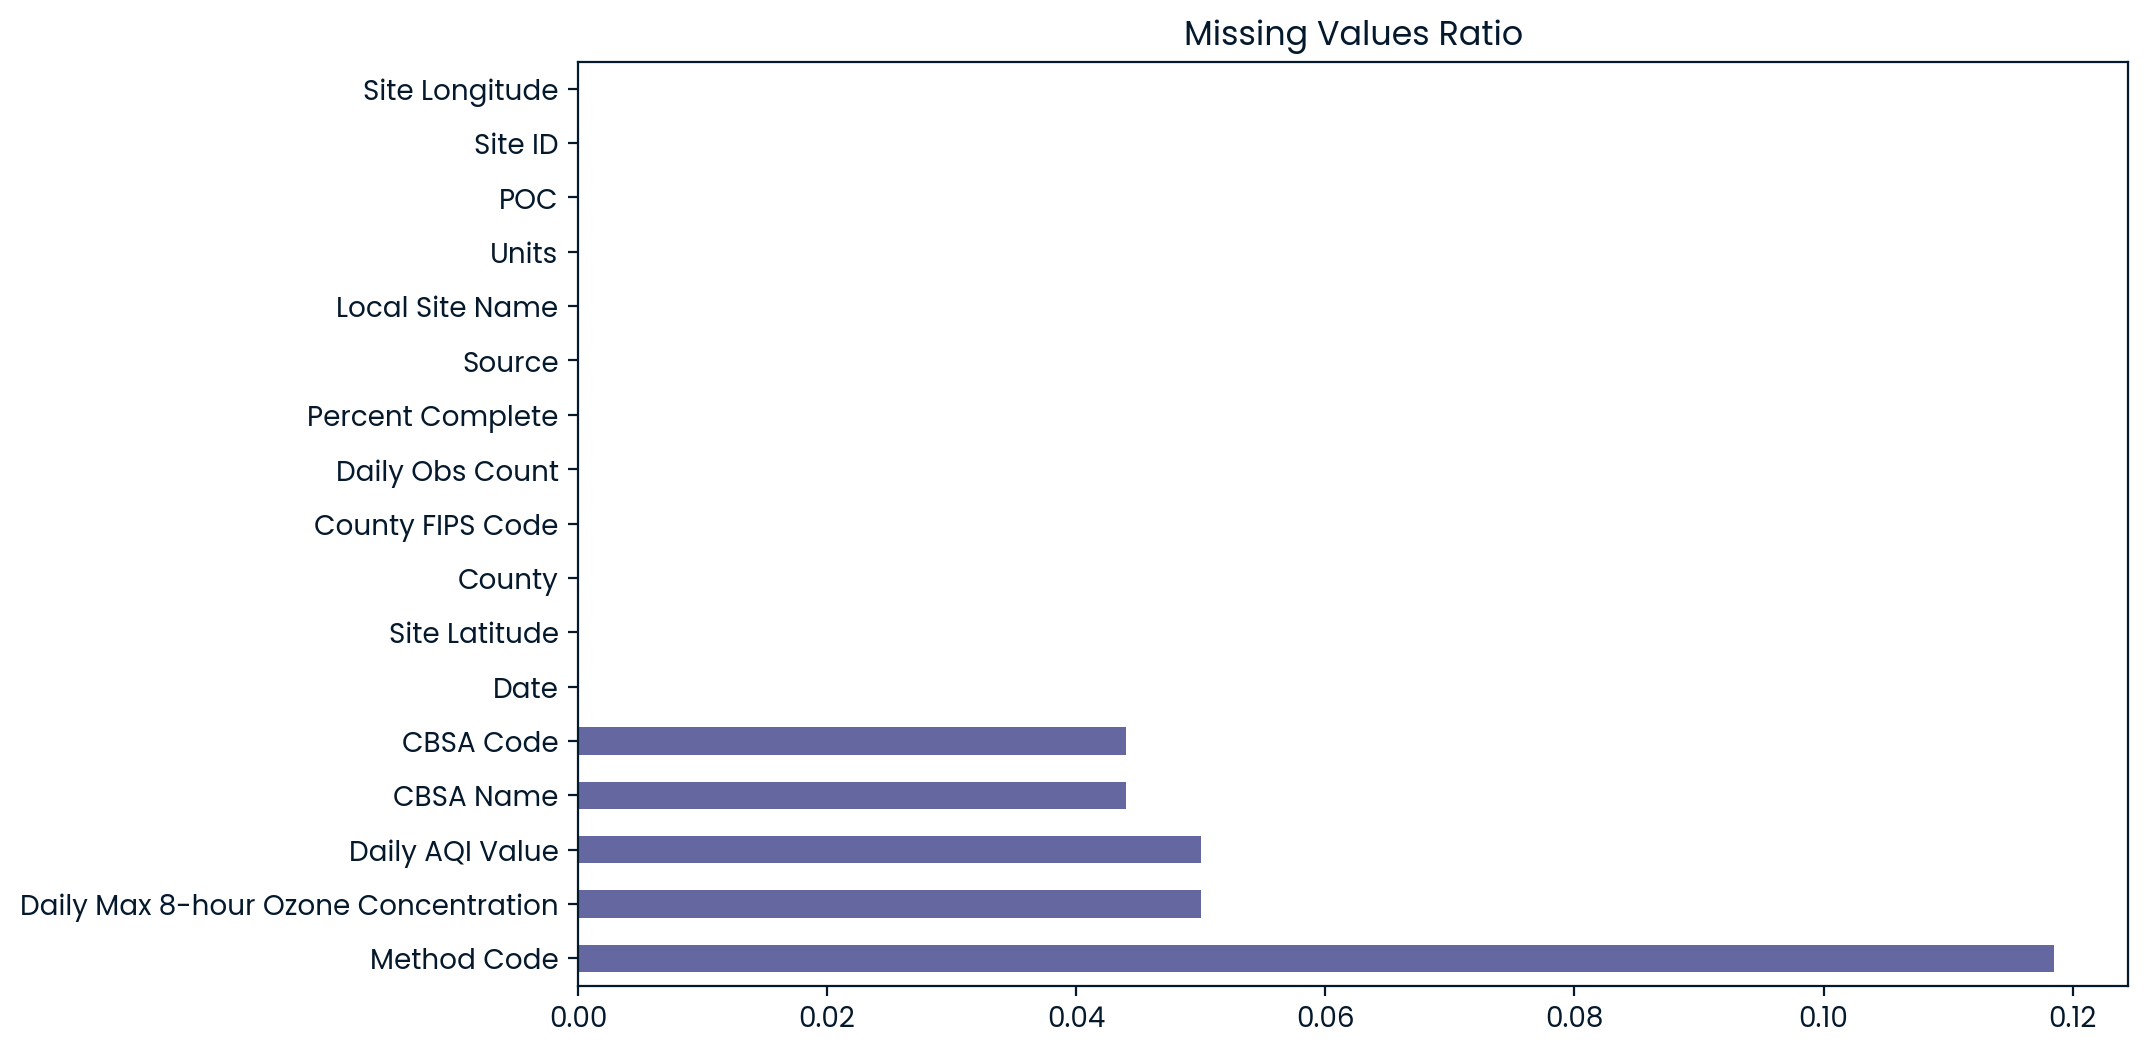

In [5]:
df.isnull().mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Missing Values Ratio')

In [6]:
df.duplicated().sum()

3576

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.shape

(51183, 17)

In [9]:
df.nunique()

Date                                    733
Source                                    2
Site ID                                 162
POC                                       2
Daily Max 8-hour Ozone Concentration    124
Units                                     1
Daily AQI Value                         120
Local Site Name                         162
Daily Obs Count                          24
Percent Complete                         23
Method Code                               4
CBSA Code                                32
CBSA Name                                32
County FIPS Code                         48
County                                   50
Site Latitude                           162
Site Longitude                          162
dtype: int64

In [10]:
df['Date'].dtype

dtype('O')

In [11]:
df['Date'].unique()

array(['/2024', '01/02/2024', 'January 04/2024', 'January 05/2024',
       'January 06/2024', '01/07/2024', 'January 10/2024',
       'January 11/2024', 'January 12/2024', '01/13/2024', '01/14/2024',
       '01/15/2024', '01/17/2024', '01/18/2024', '01/19/2024',
       '01/21/2024', '01/23/2024', '01/24/2024', '01/30/2024',
       '01/01/2024', 'January 02/2024', '01/03/2024', '01/04/2024',
       '01/06/2024', 'January 08/2024', '01/10/2024', '01/12/2024',
       '01/16/2024', 'January 18/2024', 'January 20/2024',
       'January 21/2024', '01/25/2024', 'January 26/2024', '01/27/2024',
       '01/29/2024', '01/31/2024', '02/02/2024', 'February 03/2024',
       '02/04/2024', '02/05/2024', '02/06/2024', '02/07/2024',
       '02/09/2024', '02/10/2024', '02/11/2024', '02/12/2024',
       '02/14/2024', 'February 17/2024', '02/18/2024', '02/19/2024',
       '02/20/2024', '02/21/2024', '02/22/2024', 'February 23/2024',
       'February 24/2024', '02/25/2024', '02/26/2024', '02/27/2024',
    

In [12]:
df['Date']=df['Date'].replace('/2024',np.nan)
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

In [13]:
df['Date'].unique()

<DatetimeArray>
[                'NaT', '2024-01-02 00:00:00', '2024-01-07 00:00:00',
 '2024-01-13 00:00:00', '2024-01-14 00:00:00', '2024-01-15 00:00:00',
 '2024-01-17 00:00:00', '2024-01-18 00:00:00', '2024-01-19 00:00:00',
 '2024-01-21 00:00:00',
 ...
 '2024-06-08 00:00:00', '2024-02-16 00:00:00', '2024-03-03 00:00:00',
 '2024-03-09 00:00:00', '2024-05-02 00:00:00', '2024-07-05 00:00:00',
 '2024-07-09 00:00:00', '2024-06-12 00:00:00', '2024-10-17 00:00:00',
 '2024-03-08 00:00:00']
Length: 367, dtype: datetime64[ns]

In [14]:
df['Date'].isna().sum()

14813

In [15]:
(df['Date'].isna().sum())/len(df)*100

28.94125002442217

In [16]:
df.isnull().all(axis=1).sum()

0

In [17]:
df.head(30)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,NaT,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,NaT,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,NaT,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,NaT,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
5,NaT,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
6,2024-01-07,AQS,60010007,1,0.030,ppm,28.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
7,NaT,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
8,NaT,AQS,60010007,1,0.034,ppm,31.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
9,NaT,AQS,60010007,1,0.036,ppm,33.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [18]:
df.sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
10521,2024-05-13,AQS,60290007,1,0.072,ppm,105.0,Edison,17,100.0,87.0,12540.0,"Bakersfield, CA",29,Kern,35.345607,-118.851825
15213,2024-07-22,AQS,60371201,1,0.072,ppm,105.0,Reseda,17,100.0,87.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",37,Los Angeles,34.199250,-118.532760
29710,2024-04-18,AQS,60670012,1,0.039,ppm,36.0,Folsom-Natoma St.,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",67,Sacramento,38.683304,-121.164457
5633,2024-11-10,AQS,60190011,1,0.039,ppm,36.0,Fresno - Garland,16,94.0,87.0,23420.0,"Fresno, CA",19,Fresno,36.785380,-119.773210
50702,2024-03-15,AQS,61072003,1,0.040,ppm,37.0,Visalia-W. Ashland Avenue,17,100.0,87.0,47300.0,"Visalia-Porterville, CA",107,Tulare,36.308150,-119.312900
4942,2024-12-11,AQS,60172004,1,0.037,ppm,34.0,PLACERVILLE- CANAL STREET,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",17,El Dorado,38.731960,-120.811620
13682,2024-03-28,AQS,60333002,1,0.042,ppm,39.0,Lakeport-S. Main Street,17,100.0,87.0,17340.0,"Clearlake, CA",33,Lake,39.018930,-122.913330
30144,NaT,AQS,60675003,1,0.055,ppm,51.0,Sloughhouse,15,88.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",67,Sacramento,38.494475,-121.211131
21443,2024-01-29,AQS,60531003,1,0.035,ppm,32.0,Salinas 3,17,100.0,47.0,41500.0,"Salinas, CA",53,Monterey,36.694261,-121.623271
35438,2024-05-24,AQS,60731014,1,0.050,ppm,46.0,Donovan,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.578165,-116.921374


In [19]:
df['Date'].dt.month.value_counts().sort_index()

Date
1.0     3065
2.0     2886
3.0     2931
4.0     2877
5.0     3107
6.0     3026
7.0     3125
8.0     3089
9.0     3108
10.0    3117
11.0    2968
12.0    3071
Name: count, dtype: int64

In [20]:
df=df.sort_values(by='Date').reset_index(drop=True)
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675
5,2024-01-01,AQS,60731201,1,NaN,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202


In [21]:
df.sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
40960,NaT,AQS,60372005,1,0.041,ppm,38.0,Pasadena,17,100.0,87.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",37,Los Angeles,34.132600,-118.127200
1460,2024-01-15,AQS,60658005,1,0.038,ppm,35.0,Mira Loma (Van Buren),17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.996360,-117.492400
37737,NaT,AQS,60190007,1,0.039,ppm,36.0,Fresno-Drummond,17,100.0,199.0,23420.0,"Fresno, CA",19,Fresno,36.705474,-119.741332
49195,NaT,AirNow,60950005,1,0.034,ppm,NaN,Fairfield,24,100.0,NaN,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.227066,-122.075624
32247,2024-11-20,AQS,60430003,1,0.049,ppm,45.0,Yosemite NP,17,100.0,87.0,NaN,NaN,43,Mariposa,37.713250,-119.706200
24588,2024-09-05,AQS,60731016,1,0.071,ppm,101.0,San Diego - Kearny Villa Rd.,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.845709,-117.123964
10221,2024-04-14,AQS,60290008,1,0.038,ppm,35.0,Maricopa,17,100.0,87.0,12540.0,"Bakersfield, CA",29,Kern,35.051454,-119.402620
22846,2024-08-19,AQS,60771003,1,NaN,ppm,44.0,Stockton - University Park,17,100.0,87.0,44700.0,"Stockton-Lodi, CA",77,San Joaquin,37.961578,-121.281414
1691,2024-01-18,AQS,60730001,1,0.032,ppm,30.0,Chula Vista,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.631242,-117.059088
31814,2024-11-15,AQS,60710001,1,0.041,ppm,38.0,Barstow,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.894050,-117.024710


In [22]:
df = df[df['Date'].notnull()]

In [23]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675
5,2024-01-01,AQS,60731201,1,NaN,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202


In [24]:
df.shape

(36370, 17)

In [25]:
df['Source'].value_counts()

Source
AQS       32000
AirNow     4370
Name: count, dtype: int64

In [26]:
df['Source'].isnull().sum()

0

In [27]:
df['Site ID'].value_counts()

Site ID
60250005    268
60172004    266
60392010    262
60610003    259
60610004    258
           ... 
60010016    129
60170012    119
60450011     58
60010007     12
60470003      7
Name: count, Length: 162, dtype: int64

In [28]:
df['Site ID'].isnull().sum()

0

In [29]:
df['Site ID'].nunique()

162

In [30]:
df['POC'].value_counts()

POC
1    36359
2       11
Name: count, dtype: int64

In [31]:
df['POC'].isnull().sum()

0

In [32]:
df['Daily Max 8-hour Ozone Concentration'].isnull().sum()

1785

In [33]:
df[df['Daily Max 8-hour Ozone Concentration'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
21639,2024-08-07,AirNow,60890009,1,NaN,ppm,40.0,Shasta Lake - Lake Blvd,24,100.0,NaN,39820.0,"Redding, CA",89,Shasta,40.689253,-122.402194
23345,2024-08-24,AirNow,60811001,1,NaN,ppm,27.0,Redwood City,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",81,San Mateo,37.482934,-122.203370
22211,2024-08-13,AQS,60771003,1,NaN,ppm,49.0,Stockton - University Park,17,100.0,87.0,44700.0,"Stockton-Lodi, CA",77,San Joaquin,37.961578,-121.281414
6585,2024-03-07,AQS,60651016,1,NaN,ppm,34.0,Morongo Air Monitoring Station,17,100.0,47.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.944713,-116.830074
1224,2024-01-13,AQS,60831013,1,NaN,ppm,32.0,Lompoc HSP,17,100.0,47.0,42200.0,"Santa Maria-Santa Barbara, CA",83,Santa Barbara,34.725352,-120.428717
31602,2024-11-13,AirNow,60932001,1,NaN,ppm,26.0,Yreka,24,100.0,NaN,NaN,NaN,93,Siskiyou,41.726892,-122.633579
34159,2024-12-09,AQS,60370113,1,NaN,ppm,33.0,West Los Angeles,17,100.0,87.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",37,Los Angeles,34.051110,-118.456360
5937,2024-02-29,AQS,60652007,1,NaN,ppm,42.0,Indio Amistad High School,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.725370,-116.206842
15640,2024-06-08,AQS,60392010,1,NaN,ppm,43.0,Madera-City,17,100.0,199.0,31460.0,"Madera, CA",39,Madera,36.953256,-120.034203
7338,2024-03-15,AirNow,60410001,1,NaN,ppm,38.0,San Rafael,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",41,Marin,37.972310,-122.520004


In [34]:
df['Month'] = df['Date'].dt.month

df['Daily Max 8-hour Ozone Concentration'] = df.groupby(['County', 'Month'])['Daily Max 8-hour Ozone Concentration']\
                                              .transform(lambda x: x.fillna(x.median()))

In [35]:
df['Daily Max 8-hour Ozone Concentration'].isnull().sum()

0

In [36]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1


In [37]:
df['Units'].value_counts()

Units
ppm    36370
Name: count, dtype: int64

In [38]:
df['Units'].isnull().sum()

0

In [39]:
df['Daily AQI Value'].value_counts()

Daily AQI Value
31.0     1951
44.0     1536
37.0     1207
36.0     1205
35.0     1172
         ... 
223.0       1
217.0       1
227.0       1
214.0       1
4.0         1
Name: count, Length: 118, dtype: int64

In [40]:
df['Daily AQI Value'].isnull().sum()

1870

In [41]:
df[df['Daily AQI Value'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month
1593,2024-01-17,AQS,60739991,1,0.046,ppm,NaN,La Posta Band of Indians,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.725189,-116.364410,1
5055,2024-02-21,AQS,60611004,1,0.042,ppm,NaN,Tahoe City-Fairway Drive,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.166017,-120.148833,2
30098,2024-10-29,AQS,60798002,1,0.035,ppm,NaN,Atascadero,17,100.0,87.0,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",79,San Luis Obispo,35.494530,-120.666170,10
29517,2024-10-23,AQS,60798006,1,0.059,ppm,NaN,Carrizo Plains,17,100.0,87.0,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",79,San Luis Obispo,35.354720,-120.040190,10
13515,2024-05-18,AQS,60658001,1,0.059,ppm,NaN,Rubidoux,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.999580,-117.416010,5
4480,2024-02-15,AQS,60295002,1,0.036,ppm,NaN,Arvin-Di Giorgio,17,100.0,87.0,12540.0,"Bakersfield, CA",29,Kern,35.239180,-118.788630,2
11147,2024-04-24,AQS,60590007,1,0.034,ppm,NaN,Anaheim,17,100.0,87.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",59,Orange,33.830620,-117.938450,4
2026,2024-01-21,AQS,60890009,1,0.035,ppm,NaN,Shasta Lake - Lake Blvd,17,100.0,199.0,39820.0,"Redding, CA",89,Shasta,40.689253,-122.402194,1
15701,2024-06-09,AQS,60731201,1,0.031,ppm,NaN,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,6
7835,2024-03-21,AQS,60390004,1,0.043,ppm,NaN,Madera-Pump Yard,17,100.0,199.0,31460.0,"Madera, CA",39,Madera,36.867125,-120.010158,3


In [42]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Daily AQI Value'] = df.groupby(['County', 'Week'])['Daily AQI Value']\
                          .transform(lambda x: x.fillna(x.median()))

In [43]:
df['Daily AQI Value'].isnull().sum()

0

In [44]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579,1,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1,1


In [45]:
df['Local Site Name'].unique()

array(['Colfax-City Hall', 'Pinnacles NP', 'Grass Valley-Litton Building',
       'Vacaville-Ulatis Drive', 'Los Gatos', 'Pala Airpad',
       'Hesperia-Olive Street', 'Red Bluff-Walnut St. District Office',
       'Yreka', 'Temecula', 'Chico-East Avenue',
       'La Posta Band of Indians', 'Woodland-Gibson Road', 'Sloughhouse',
       'Yosemite NP', 'Bakersfield-California',
       'Table Mountain Air Monitoring Site', 'Lincoln-2885 Moore Road',
       'San Rafael', 'Sequoia & Kings Canyon NPs - Ash Mountain',
       'Anaheim', 'Oakland West', 'Lompoc HSP', 'Chula Vista',
       'Paradise Road', 'Fresno-Sky Park', 'Jacobs',
       'Simi Valley-Cochran Street', 'Hayward',
       'PLACERVILLE- CANAL STREET', 'Alpine', 'Fairfield',
       'Piru - Pacific', 'Parlier', 'Victorville-Park Avenue',
       'Crestline', 'Joshua Tree NP - Cottonwood Visitor Center',
       'Donovan', 'Salinas 3', 'Carmel Valley', 'Yuba City', 'Barstow',
       'Fresno - Garland', 'Hanford-Irwin', 'Carpinteria',


In [46]:
df['Local Site Name'].nunique()

162

In [47]:
df['Local Site Name'].isnull().sum()

0

In [48]:
df['Daily Obs Count'].value_counts()

Daily Obs Count
17      30651
24       3968
1000      361
14        324
13        288
15        269
19        133
16        131
18        119
21         37
22         27
23         25
20         16
12          6
11          3
10          3
9           2
7           1
2           1
6           1
1           1
8           1
5           1
4           1
Name: count, dtype: int64

In [49]:
df['Daily Obs Count'].isnull().sum()

0

In [50]:
df['Percent Complete'].value_counts()

Percent Complete
100.0    34968
82.0       328
88.0       308
76.0       289
94.0       134
79.0       133
75.0       121
92.0        27
96.0        25
83.0        16
71.0         6
65.0         3
59.0         3
53.0         2
41.0         1
12.0         1
35.0         1
6.0          1
47.0         1
29.0         1
24.0         1
Name: count, dtype: int64

In [51]:
df['Percent Complete'].isnull().sum()

0

In [52]:
df['Method Code'].value_counts()

Method Code
87.0     23367
47.0      5676
199.0     2698
53.0       259
Name: count, dtype: int64

In [53]:
df['Method Code'].isnull().sum()

4370

In [54]:
df[df['Method Code'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
30555,2024-11-03,AirNow,60750005,1,0.028,ppm,26.0,San Francisco,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",75,San Francisco,37.765946,-122.399044,11,44
23775,2024-08-28,AirNow,60850005,1,0.046,ppm,41.5,San Jose - Jackson,24,100.0,NaN,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.348497,-121.894898,8,35
6481,2024-03-06,AirNow,60111002,1,0.036,ppm,33.0,Colusa-Sunrise Blvd,24,100.0,NaN,NaN,NaN,11,Colusa,39.189190,-121.998870,3,10
35825,2024-12-26,AirNow,60831014,1,0.031,ppm,29.0,Paradise Road,18,75.0,NaN,42200.0,"Santa Maria-Santa Barbara, CA",83,Santa Barbara,34.541660,-119.791460,12,52
36055,2024-12-28,AirNow,60010013,1,0.019,ppm,18.0,Berkeley- Aquatic Park,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.864767,-122.302741,12,52
26026,2024-09-19,AirNow,60010009,1,0.022,ppm,25.5,Oakland,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935,9,38
27262,2024-10-01,AirNow,60811001,1,0.056,ppm,54.0,Redwood City,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",81,San Mateo,37.482934,-122.203370,10,40
17949,2024-07-01,AirNow,60131004,1,0.017,ppm,16.0,San Pablo,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",13,Contra Costa,37.960400,-122.356811,7,27
14412,2024-05-27,AirNow,60410001,1,0.029,ppm,27.0,San Rafael,24,100.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",41,Marin,37.972310,-122.520004,5,22
1255,2024-01-13,AirNow,60650009,1,0.048,ppm,44.0,Pechanga,24,100.0,NaN,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.447867,-117.088649,1,2


In [55]:
df['Method Code'] = df.groupby(['Site ID', 'POC'])['Method Code']\
                      .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [56]:
df['Method Code'].isnull().sum()

402

In [57]:
df['Method Code'] = df.groupby(['County','Local Site Name'])['Method Code']\
                      .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [58]:
df['Method Code'].isnull().sum()

402

In [59]:
df['Method Code'].fillna(df['Method Code'].mode().iloc[0], inplace=True)

In [60]:
df['Method Code'].isnull().sum()

0

In [61]:
df['CBSA Code'].value_counts()

CBSA Code
40140.0    4827
40900.0    3412
31080.0    3308
41860.0    2349
41740.0    2138
42200.0    2130
12540.0    1855
23420.0    1673
42020.0    1458
37100.0    1214
41940.0    1213
47300.0     852
20940.0     819
41500.0     735
13860.0     685
39820.0     637
46700.0     629
31460.0     498
17020.0     485
44700.0     466
33700.0     459
39780.0     395
49700.0     372
46380.0     290
43760.0     252
42100.0     250
32900.0     247
46020.0     244
25260.0     239
17340.0     238
21700.0     231
42220.0     187
Name: count, dtype: int64

In [62]:
df['CBSA Code'].isnull().sum()

1583

In [63]:
df[df['CBSA Code'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
25161,2024-09-11,AQS,60210003,1,0.0310,ppm,29.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.533870,-122.190834,9,37
11225,2024-04-25,AQS,60210003,1,0.0370,ppm,34.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.533870,-122.190834,4,17
26497,2024-09-24,AQS,60111002,1,0.0510,ppm,47.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.189190,-121.998870,9,39
19358,2024-07-15,AQS,60932001,1,0.0490,ppm,45.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579,7,29
20703,2024-07-28,AQS,60430003,1,0.0580,ppm,46.0,Yosemite NP,17,100.0,87.0,NaN,NaN,43,Mariposa,37.713250,-119.706200,7,30
16025,2024-06-12,AQS,60111002,1,0.0500,ppm,46.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.189190,-121.998870,6,24
12057,2024-05-04,AQS,60050002,1,0.0440,ppm,45.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,5,18
17436,2024-06-26,AQS,60430003,1,0.0500,ppm,46.0,Yosemite NP,17,100.0,87.0,NaN,NaN,43,Mariposa,37.713250,-119.706200,6,26
20976,2024-07-31,AQS,60210003,1,0.0420,ppm,39.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.533870,-122.190834,7,31
1589,2024-01-17,AQS,60430003,1,0.0420,ppm,39.0,Yosemite NP,17,100.0,47.0,NaN,NaN,43,Mariposa,37.713250,-119.706200,1,3


In [64]:
df[df['County']=='Colusa'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
5770,2024-02-28,AirNow,60111002,1,0.035,ppm,32.0,Colusa-Sunrise Blvd,24,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,2,9
24628,2024-09-06,AQS,60111002,1,0.050,ppm,46.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,9,36
30920,2024-11-06,AQS,60111002,1,0.036,ppm,33.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,11,45
23723,2024-08-28,AQS,60111002,1,0.055,ppm,51.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,8,35
15483,2024-06-07,AQS,60111002,1,0.047,ppm,44.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,6,23
2568,2024-01-27,AirNow,60111002,1,0.027,ppm,25.0,Colusa-Sunrise Blvd,24,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,1,4
11696,2024-04-30,AQS,60111002,1,0.048,ppm,44.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,4,18
25148,2024-09-11,AQS,60111002,1,0.034,ppm,31.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,9,37
6171,2024-03-03,AirNow,60111002,1,0.040,ppm,37.0,Colusa-Sunrise Blvd,24,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,3,9
29836,2024-10-27,AQS,60111002,1,0.041,ppm,33.0,Colusa-Sunrise Blvd,17,100.0,87.0,NaN,NaN,11,Colusa,39.18919,-121.99887,10,43


In [65]:
df[df['County']=='Calaveras'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
30317,2024-10-31,AQS,60090001,1,0.0500,ppm,39.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,10,44
4266,2024-02-12,AQS,60090001,1,0.0310,ppm,29.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,2,7
6191,2024-03-03,AQS,60090001,1,0.0390,ppm,36.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,3,9
26459,2024-09-23,AQS,60090001,1,0.0660,ppm,87.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,9,39
30623,2024-11-03,AQS,60090001,1,0.0330,ppm,31.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,11,44
20588,2024-07-27,AQS,60090001,1,0.0480,ppm,44.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,7,30
2626,2024-01-27,AQS,60090001,1,0.0190,ppm,18.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,1,4
35643,2024-12-24,AQS,60090001,1,0.0410,ppm,38.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,12,52
24112,2024-09-01,AQS,60090001,1,0.0580,ppm,61.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,9,35
32299,2024-11-20,AQS,60090001,1,0.0460,ppm,43.0,San Andreas-Gold Strike Road,17,100.0,87.0,NaN,NaN,9,Calaveras,38.20185,-120.680277,11,47


In [66]:
df[df['County']=='Glenn'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
4334,2024-02-13,AQS,60210003,1,0.029,ppm,27.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,2,7
20189,2024-07-23,AQS,60210003,1,0.048,ppm,44.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,7,30
1221,2024-01-13,AirNow,60210003,1,0.025,ppm,23.0,Willows-Colusa Street,24,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,1,2
9200,2024-04-04,AQS,60210003,1,0.042,ppm,39.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,4,14
20545,2024-07-27,AQS,60210003,1,0.029,ppm,27.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,7,30
35104,2024-12-19,AQS,60210003,1,0.014,ppm,13.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,12,51
16609,2024-06-18,AQS,60210003,1,0.041,ppm,38.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,6,25
25112,2024-09-10,AQS,60210003,1,0.044,ppm,41.0,Willows-Colusa Street,14,82.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,9,37
9859,2024-04-10,AQS,60210003,1,0.041,ppm,38.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,4,15
22260,2024-08-13,AQS,60210003,1,0.044,ppm,41.0,Willows-Colusa Street,17,100.0,87.0,NaN,NaN,21,Glenn,39.53387,-122.190834,8,33


In [67]:
df[df['County']=='Amador'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
3830,2024-02-08,AQS,60050002,1,0.032,ppm,30.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,2,6
5257,2024-02-22,AQS,60050002,1,0.035,ppm,32.0,Jackson-Clinton Road,1000,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,2,8
15393,2024-06-06,AQS,60050002,1,0.045,ppm,42.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,6,23
7562,2024-03-17,AQS,60050002,1,0.043,ppm,40.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,3,11
25011,2024-09-09,AQS,60050002,1,0.052,ppm,48.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,9,37
33377,2024-12-01,AQS,60050002,1,0.027,ppm,21.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,12,48
4584,2024-02-16,AQS,60050002,1,0.028,ppm,26.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,2,7
3558,2024-02-05,AQS,60050002,1,0.036,ppm,33.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,2,6
23363,2024-08-24,AQS,60050002,1,0.040,ppm,37.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,8,34
1971,2024-01-20,AQS,60050002,1,0.035,ppm,32.0,Jackson-Clinton Road,17,100.0,87.0,NaN,NaN,5,Amador,38.342606,-120.764426,1,3


In [68]:
df['CBSA Code'] = df['CBSA Code'].fillna(-1)

In [69]:
df['CBSA Code'].isnull().sum()

0

In [70]:
df['CBSA Name'].isnull().sum()

1583

In [71]:
df['CBSA Name'] = df['CBSA Name'].fillna('Non-CBSA')

In [72]:
df['CBSA Name'].isnull().sum()

0

In [73]:
df['CBSA Name'].unique()

array(['Sacramento--Roseville--Arden-Arcade, CA',
       'San Jose-Sunnyvale-Santa Clara, CA', 'Truckee-Grass Valley, CA',
       'Vallejo-Fairfield, CA', 'San Diego-Carlsbad, CA',
       'Riverside-San Bernardino-Ontario, CA', 'Red Bluff, CA',
       'Non-CBSA', 'Chico, CA', 'Bakersfield, CA', 'Fresno, CA',
       'San Francisco-Oakland-Hayward, CA', 'Visalia-Porterville, CA',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Santa Maria-Santa Barbara, CA', 'Eureka-Arcata-Fortuna, CA',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Salinas, CA', 'Yuba City, CA',
       'Hanford-Corcoran, CA', 'Modesto, CA', 'Merced, CA',
       'San Luis Obispo-Paso Robles-Arroyo Grande, CA', 'Clearlake, CA',
       'Santa Rosa, CA', 'El Centro, CA', 'Sonora, CA', 'Redding, CA',
       'Stockton-Lodi, CA', 'Madera, CA', 'Santa Cruz-Watsonville, CA',
       'Bishop, CA', 'Ukiah, CA'], dtype=object)

In [74]:
df['CBSA Name'] = df['CBSA Name'].replace(
    {'Sacramento--Roseville--Arden-Arcade, CA': 'Sacramento-Roseville-Arden-Arcade, CA'})

In [75]:
df['CBSA Name'].unique()

array(['Sacramento-Roseville-Arden-Arcade, CA',
       'San Jose-Sunnyvale-Santa Clara, CA', 'Truckee-Grass Valley, CA',
       'Vallejo-Fairfield, CA', 'San Diego-Carlsbad, CA',
       'Riverside-San Bernardino-Ontario, CA', 'Red Bluff, CA',
       'Non-CBSA', 'Chico, CA', 'Bakersfield, CA', 'Fresno, CA',
       'San Francisco-Oakland-Hayward, CA', 'Visalia-Porterville, CA',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Santa Maria-Santa Barbara, CA', 'Eureka-Arcata-Fortuna, CA',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Salinas, CA', 'Yuba City, CA',
       'Hanford-Corcoran, CA', 'Modesto, CA', 'Merced, CA',
       'San Luis Obispo-Paso Robles-Arroyo Grande, CA', 'Clearlake, CA',
       'Santa Rosa, CA', 'El Centro, CA', 'Sonora, CA', 'Redding, CA',
       'Stockton-Lodi, CA', 'Madera, CA', 'Santa Cruz-Watsonville, CA',
       'Bishop, CA', 'Ukiah, CA'], dtype=object)

In [76]:
df['County FIPS Code'].value_counts()

County FIPS Code
37     2822
65     2674
71     2153
73     2138
83     2130
29     1855
19     1673
79     1458
61     1228
111    1214
67     1197
1       914
107     852
25      819
85      751
53      735
13      732
27      685
89      637
95      629
17      519
39      498
59      486
7       485
113     468
77      466
69      462
99      459
43      400
103     395
101     372
45      290
109     252
87      250
47      247
93      247
41      246
57      244
75      241
21      240
31      239
33      238
5       236
11      231
23      231
9       229
81      216
97      187
Name: count, dtype: int64

In [77]:
df['County FIPS Code'].isnull().sum()

0

In [78]:
df['County'].unique()

array(['Placer', 'San Benito', 'Nevada', 'Solano', 'Santa Clara',
       'San Diego', 'San Bernardino', 'Tehama', 'Siskiyou', 'Riverside',
       'Butte', 'Yolo', 'Sacramento', 'Mariposa', 'Kern', 'Fresno',
       'Marin', 'Tulare', 'Orange', 'Alameda', 'Santa Barbara',
       'Humboldt', 'Ventura', 'El Dorado', 'Monterey', 'Sutter', 'Kings',
       'Stanislaus', 'Merced', 'Los Angeles', 'Contra Costa',
       'San Luis Obispo', 'San Mateo', 'Lake', 'Sonoma', 'Imperial',
       'Tuolumne', 'Shasta', 'San Joaquin', 'Madera', 'Santa Cruz',
       'Colusa', 'Inyo', 'San Francisco', 'Glenn', 'Amador', 'Mendocino',
       'Calaveras', 'LA', 'SF'], dtype=object)

In [79]:
df['County'] = df['County'].replace({
    'LA': 'Los Angeles',
    'SF': 'San Francisco'
})

In [80]:
df['County'].unique()

array(['Placer', 'San Benito', 'Nevada', 'Solano', 'Santa Clara',
       'San Diego', 'San Bernardino', 'Tehama', 'Siskiyou', 'Riverside',
       'Butte', 'Yolo', 'Sacramento', 'Mariposa', 'Kern', 'Fresno',
       'Marin', 'Tulare', 'Orange', 'Alameda', 'Santa Barbara',
       'Humboldt', 'Ventura', 'El Dorado', 'Monterey', 'Sutter', 'Kings',
       'Stanislaus', 'Merced', 'Los Angeles', 'Contra Costa',
       'San Luis Obispo', 'San Mateo', 'Lake', 'Sonoma', 'Imperial',
       'Tuolumne', 'Shasta', 'San Joaquin', 'Madera', 'Santa Cruz',
       'Colusa', 'Inyo', 'San Francisco', 'Glenn', 'Amador', 'Mendocino',
       'Calaveras'], dtype=object)

In [81]:
df['County'].isnull().sum()

0

In [82]:
df['Site Latitude'].isnull().sum()

0

In [83]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento-Roseville-Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,87.0,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,-1.0,Non-CBSA,93,Siskiyou,41.726892,-122.633579,1,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1,1


In [84]:
df.drop(columns=['Month','Week'],inplace=True)

In [85]:
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento-Roseville-Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,87.0,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675


<Axes: title={'center': 'Missing Values Ratio'}>

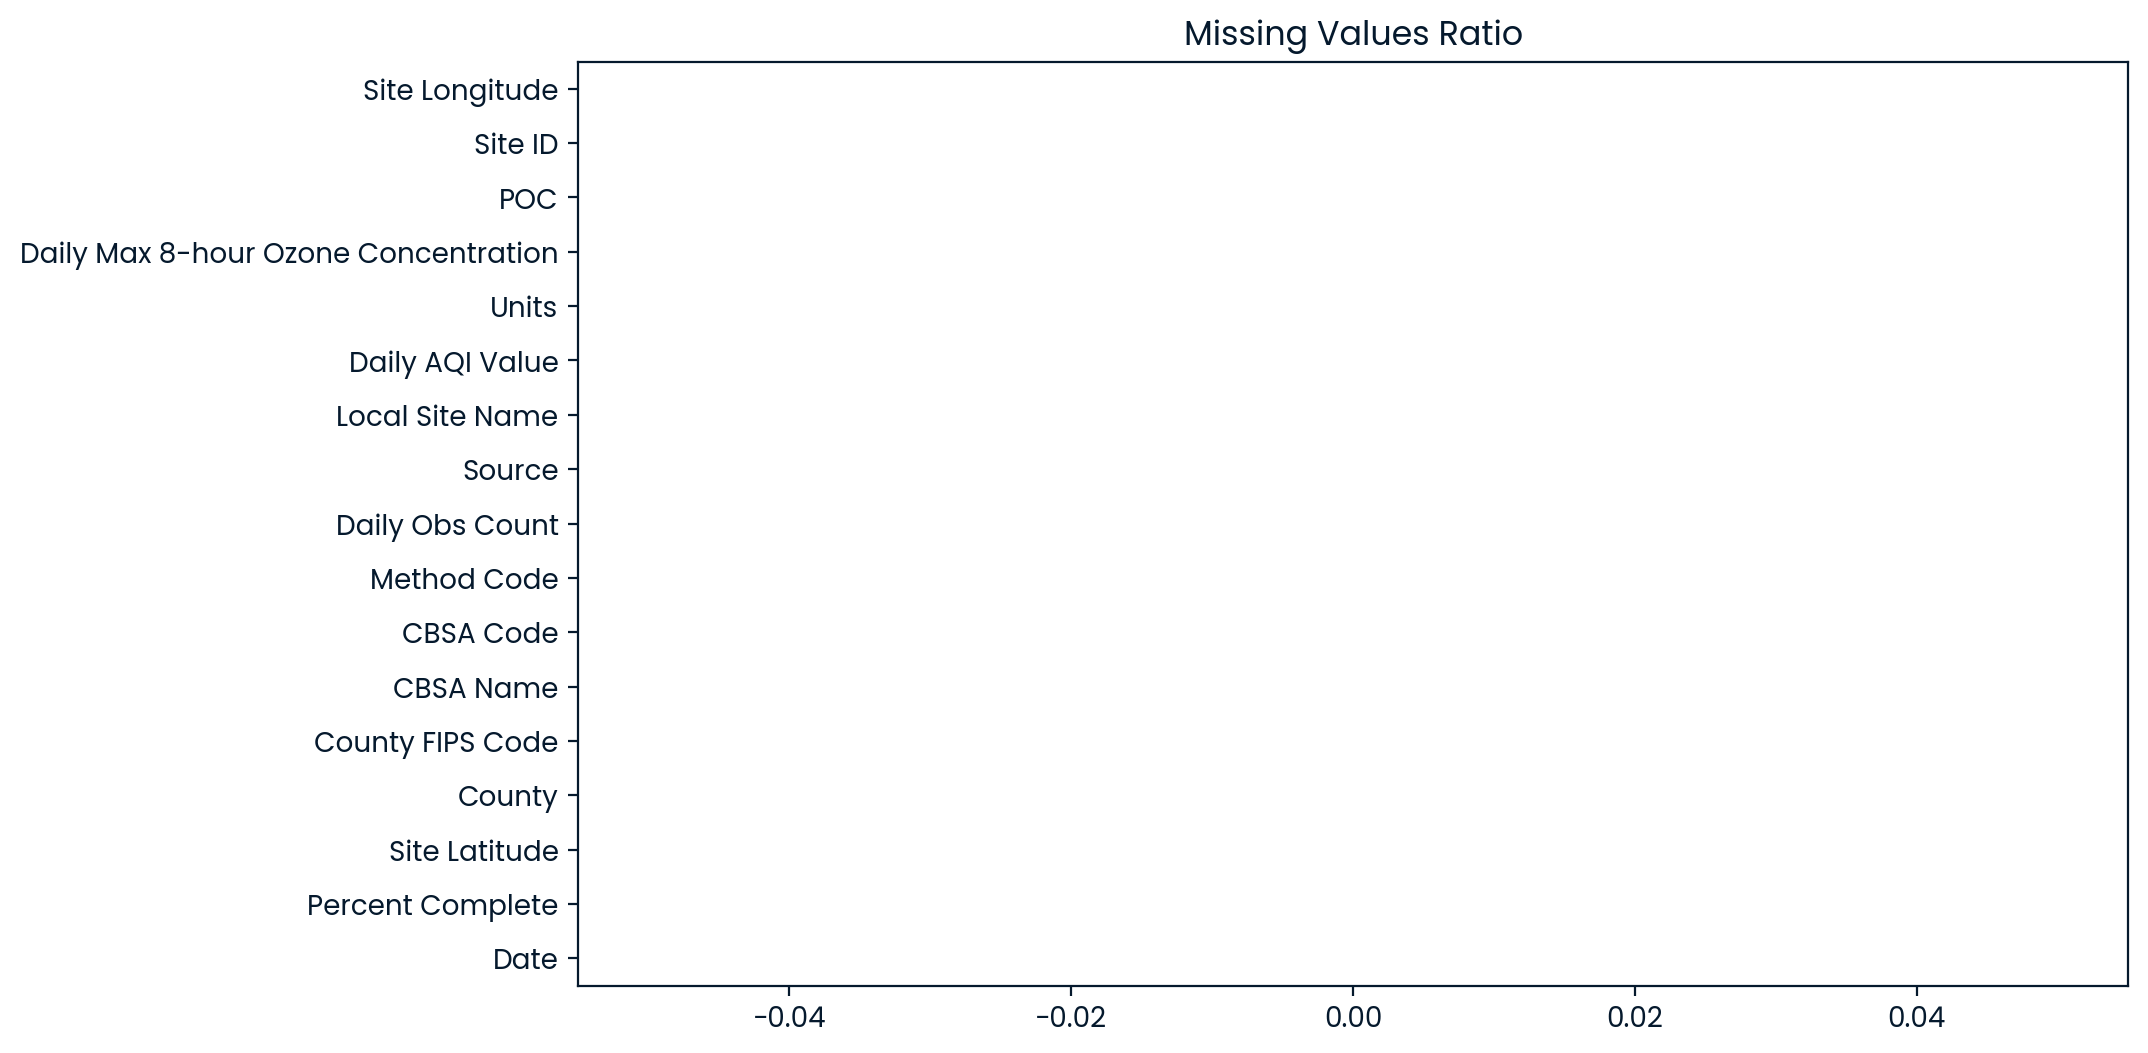

In [86]:
df.isnull().mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Missing Values Ratio')

<Axes: title={'center': 'Monthly Avg Ozone Over Time'}, xlabel='Month'>

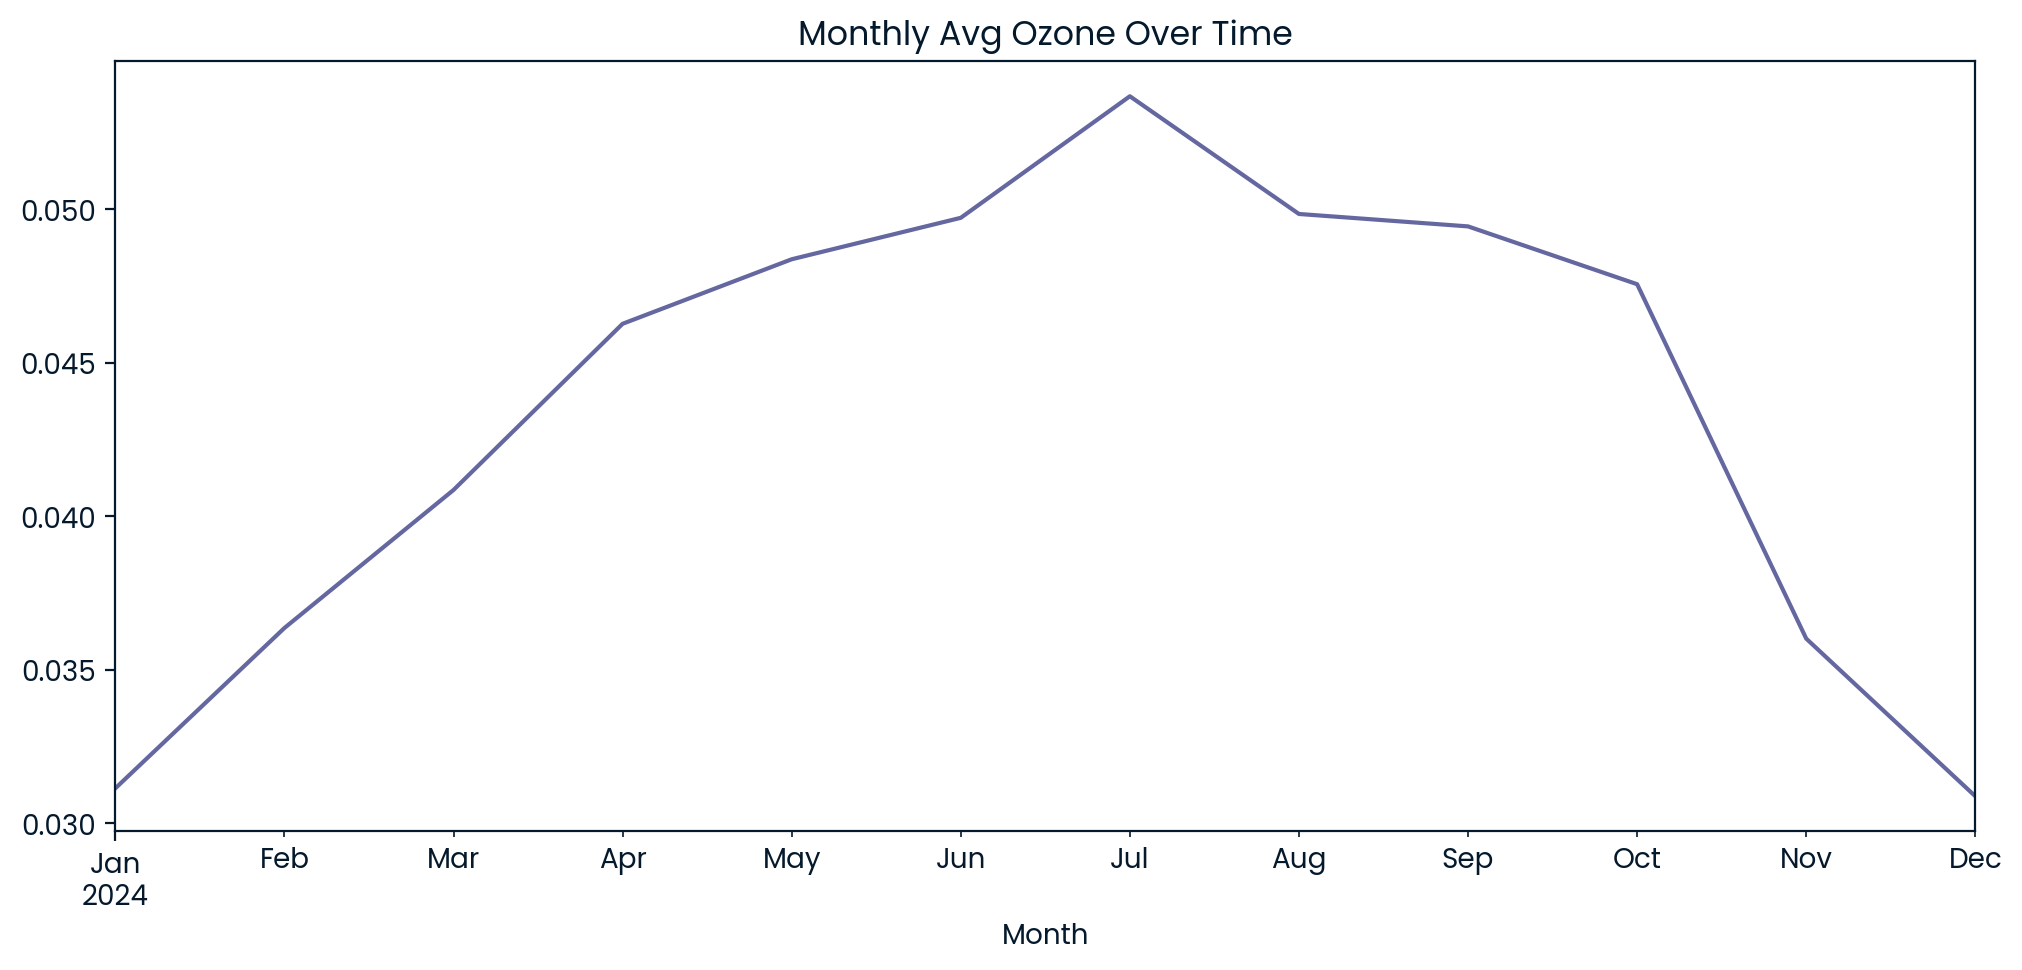

In [87]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Daily Max 8-hour Ozone Concentration'].mean()
monthly_avg.plot(figsize=(12, 5), title='Monthly Avg Ozone Over Time')

Text(0.5, 1.0, 'Ozone Concentration by County')

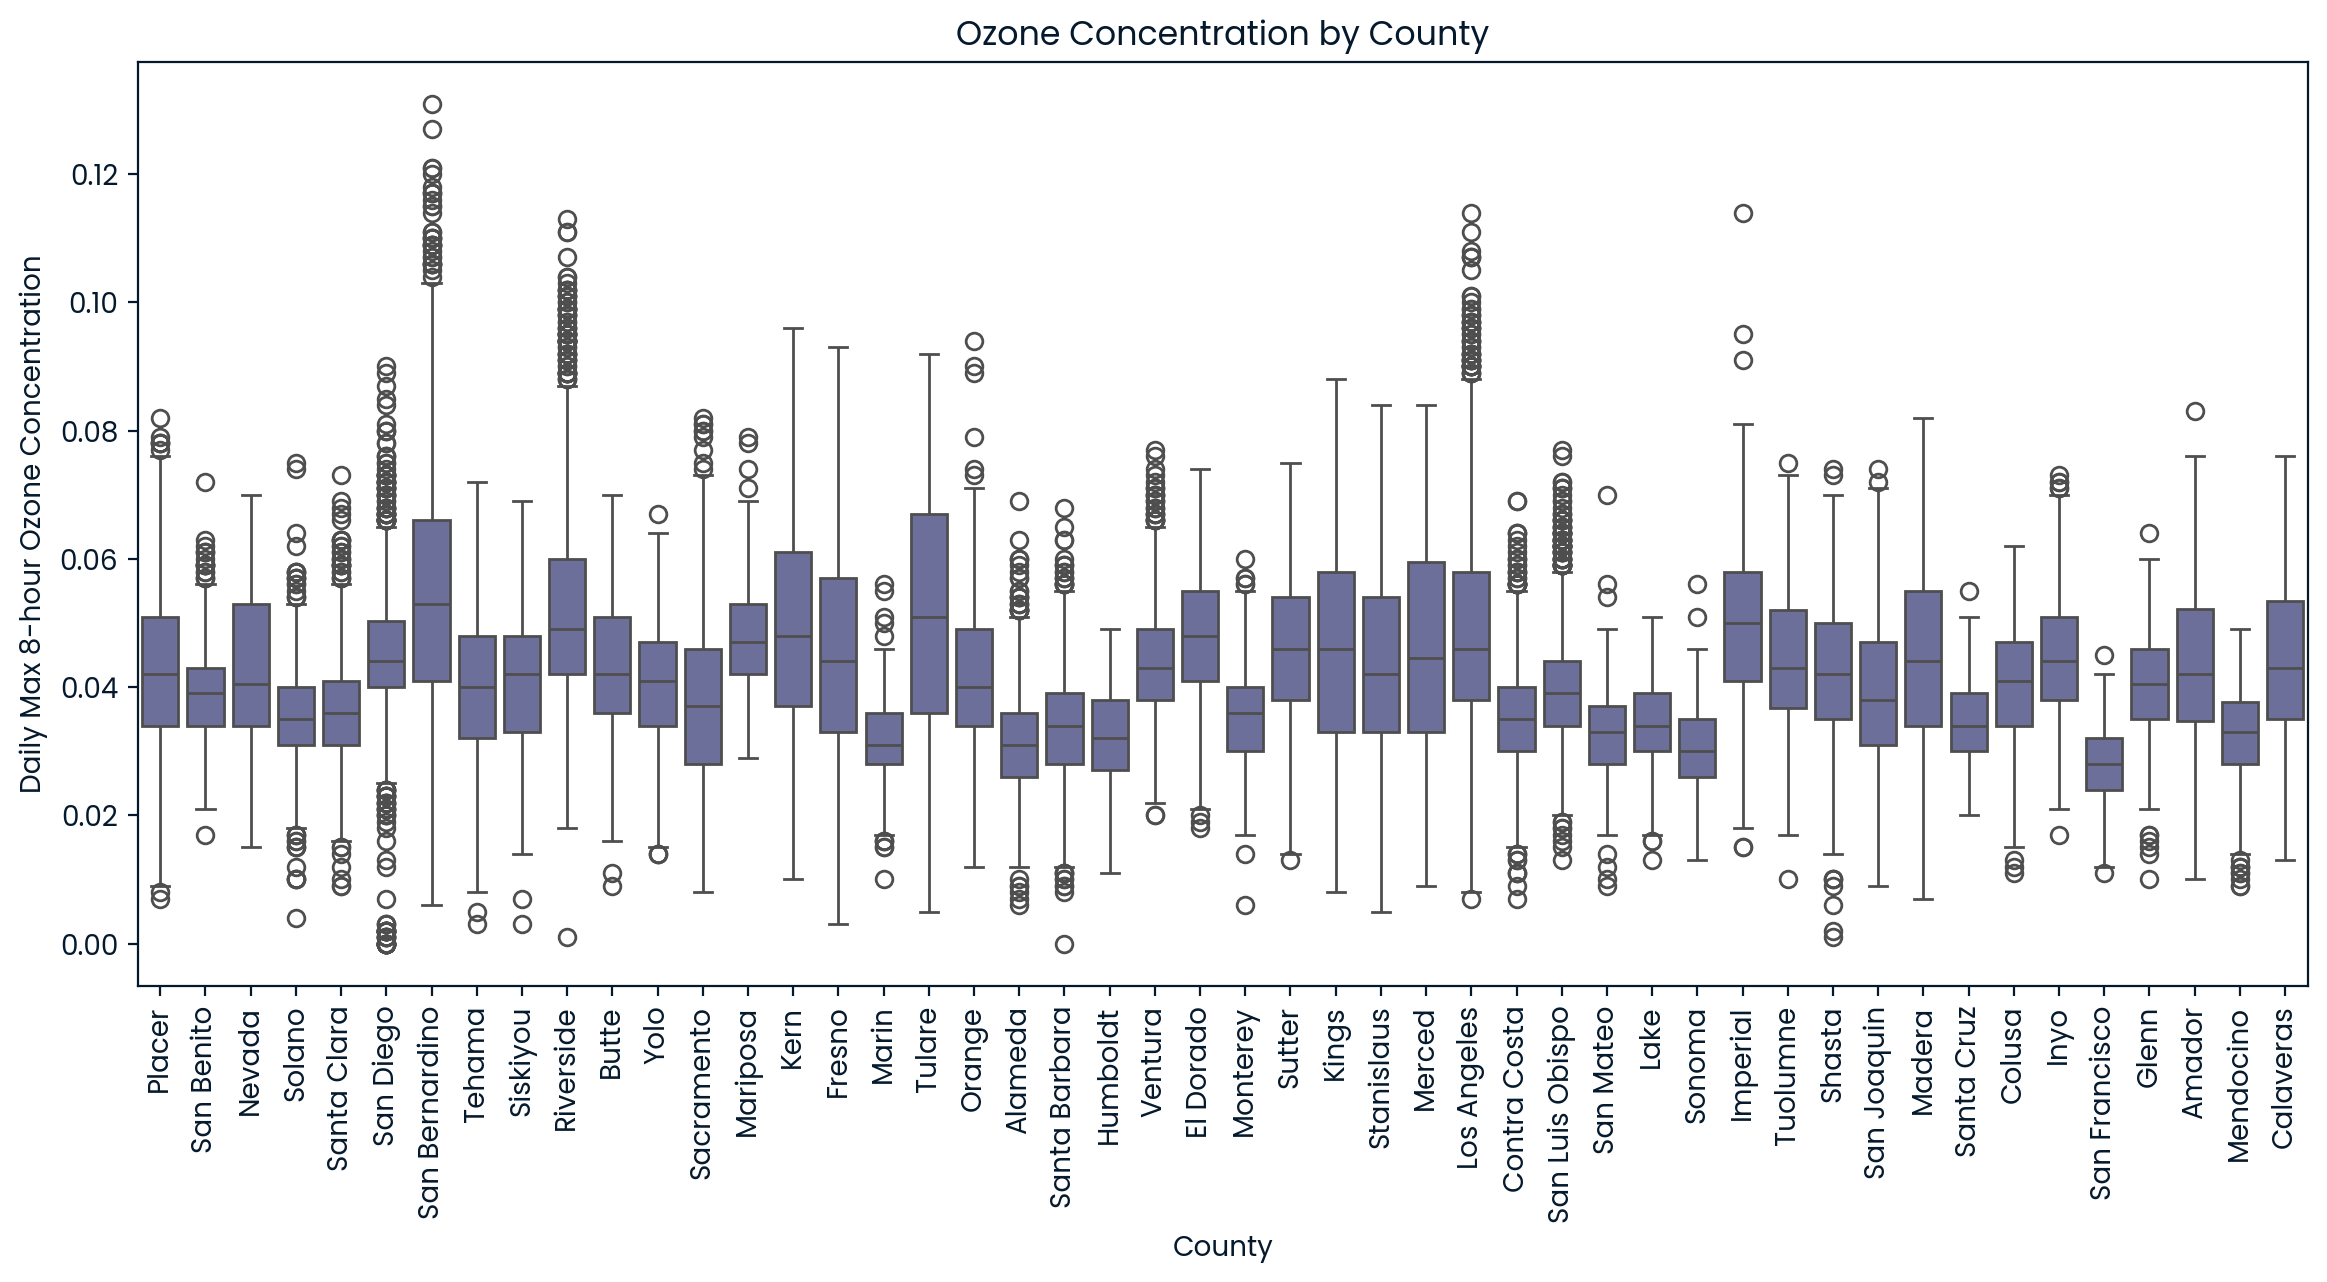

In [88]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='County', y='Daily Max 8-hour Ozone Concentration')
plt.xticks(rotation=90)
plt.title('Ozone Concentration by County')

<Axes: title={'center': 'Top 10 Counties with Highest Ozone Levels'}, xlabel='County'>

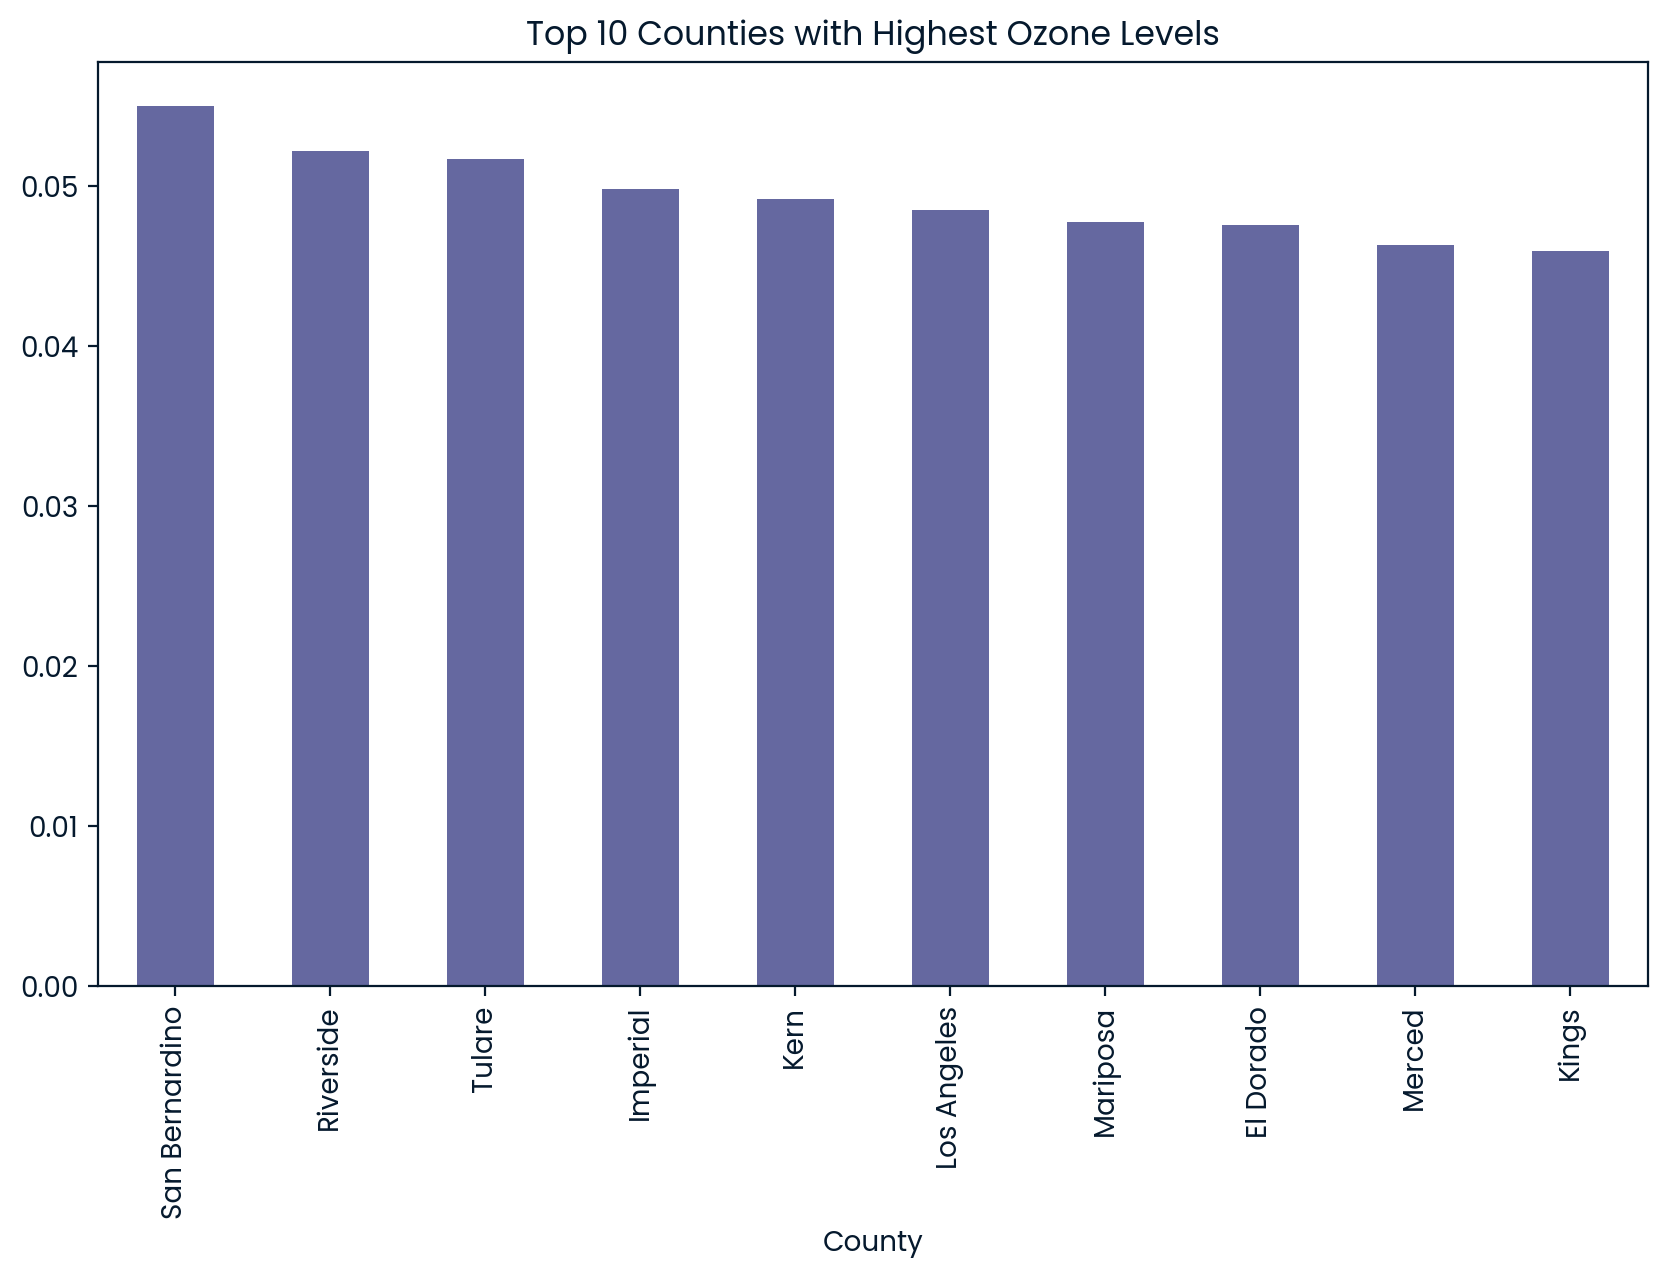

In [89]:
top_ozone = df.groupby('County')['Daily Max 8-hour Ozone Concentration'].mean().sort_values(ascending=False).head(10)
top_ozone.plot(kind='bar', figsize=(10,6), title='Top 10 Counties with Highest Ozone Levels')

Text(0.5, 1.0, 'Ozone by Method Code')

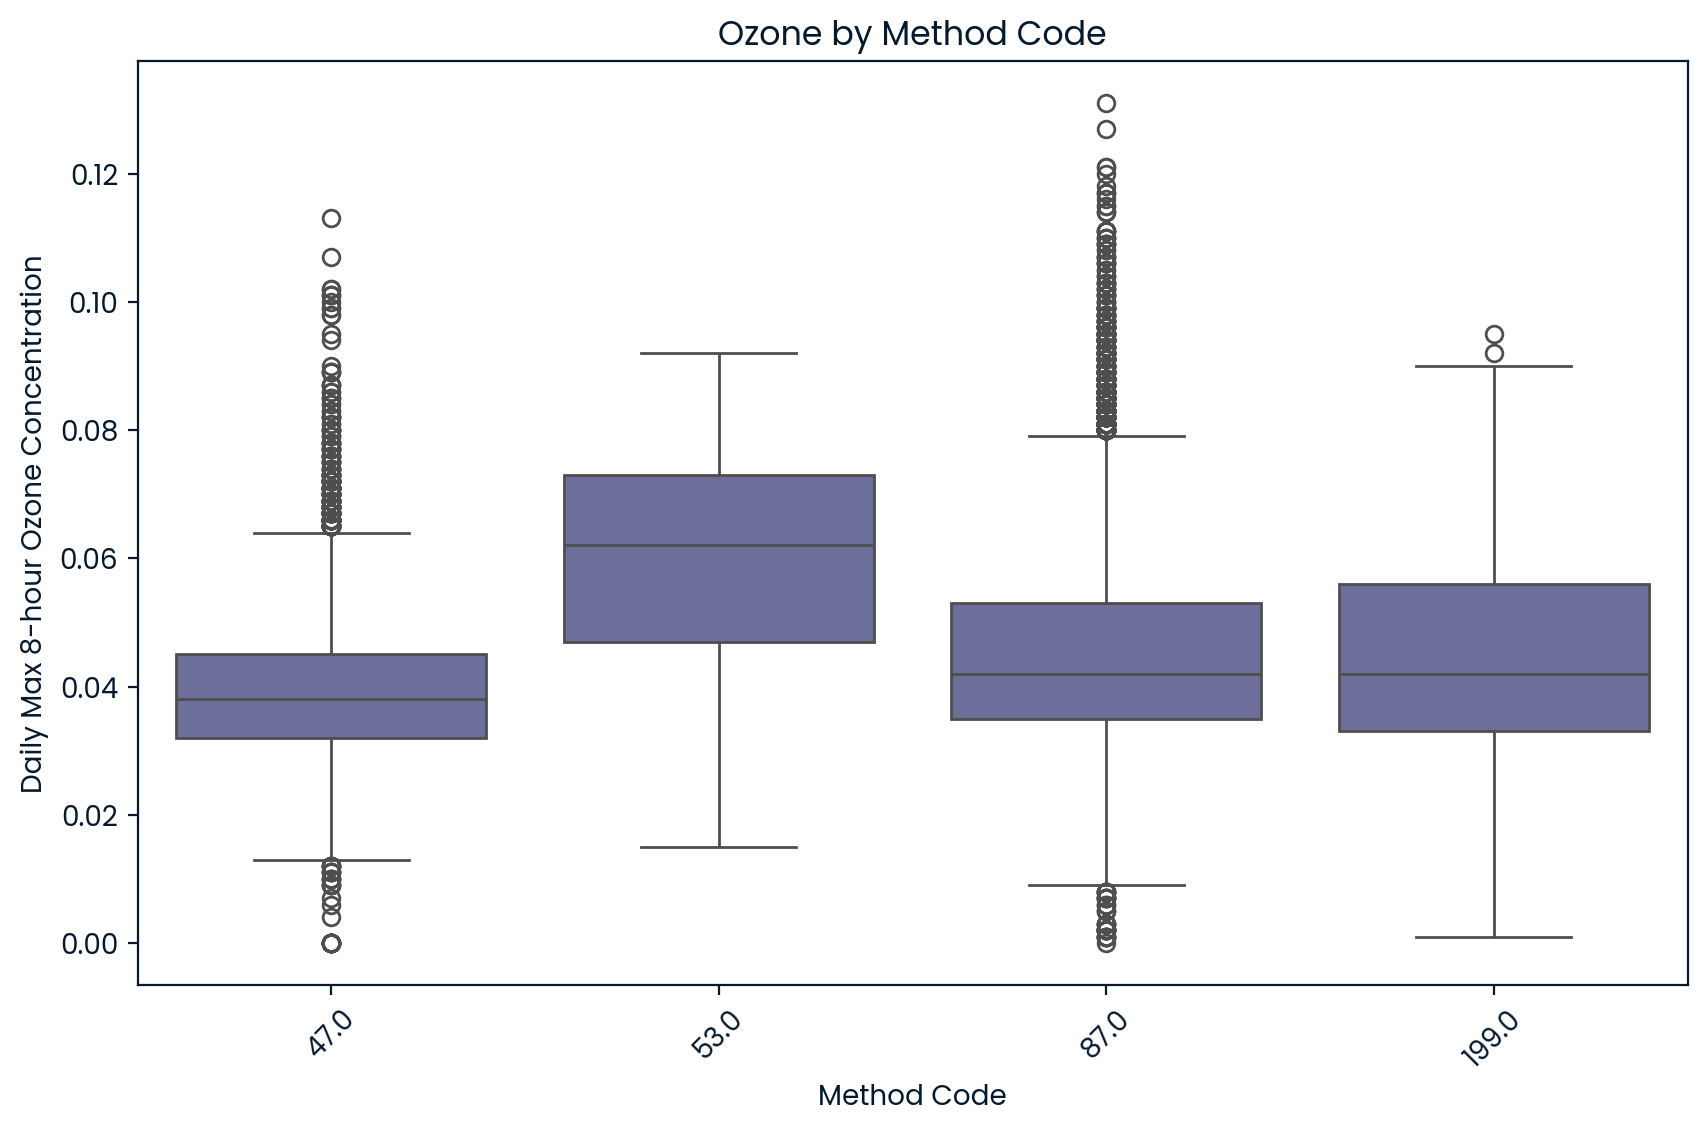

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Method Code', y='Daily Max 8-hour Ozone Concentration')
plt.xticks(rotation=45)
plt.title('Ozone by Method Code')

<Axes: xlabel='Day Type', ylabel='Daily Max 8-hour Ozone Concentration'>

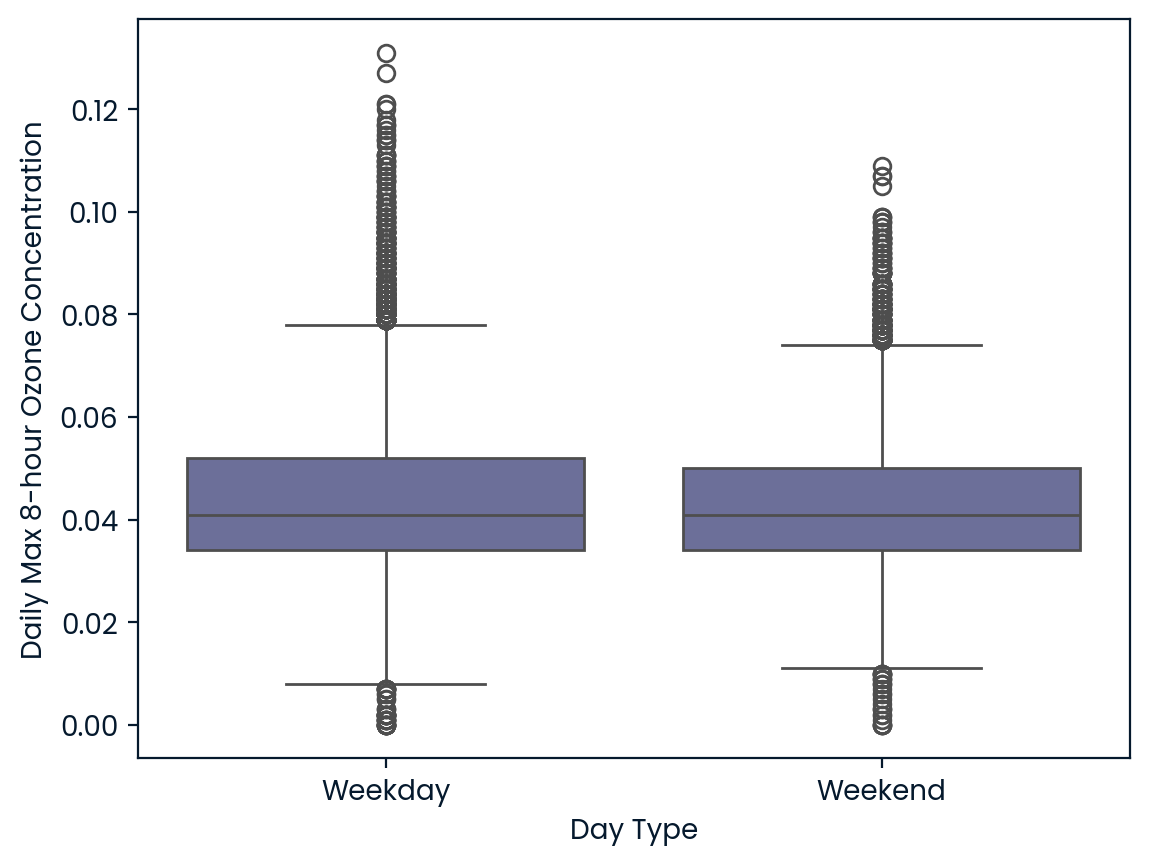

In [91]:
df['Day'] = df['Date'].dt.dayofweek
df['Day Type'] = df['Day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
sns.boxplot(data=df, x='Day Type', y='Daily Max 8-hour Ozone Concentration')

In [93]:
from folium.plugins import HeatMap
import folium

map = folium.Map(location=[37.5, -119.5], zoom_start=6)
heat_data = [[row['Site Latitude'], row['Site Longitude'], row['Daily Max 8-hour Ozone Concentration']] 
             for index, row in df.dropna(subset=['Site Latitude', 'Site Longitude', 'Daily Max 8-hour Ozone Concentration']).iterrows()]
HeatMap(heat_data).add_to(map)
map